# Laboratorio: Análisis de Regresión

### Antes de empezar:

* Lee el archivo README.md
* Comenta tanto como puedas y utiliza los recursos (archivo README.md)

¡Feliz aprendizaje!

## Desafío 1
Trabajo en un bootcamp de programación, y he desarrollado una teoría de que cuanto más jóvenes son mis estudiantes, más a menudo llegan tarde a clase. Para probar mi hipótesis, he recopilado algunos datos en la siguiente tabla:

| StudentID | Edad | Retrasos |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |


In [119]:
import pandas as pd
import numpy as np
import plotly.express as px
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

Utiliza este comando para crear un dataframe con los datos proporcionados en la tabla.
~~~~
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})
~~~~

In [120]:
# Your code here.
student_data = pd.DataFrame({'Edad': [17,51,27,21,36,48,19,26,54,30], 'Retrasos': [10,1,5,9,4,2,9,6,0,3]})

Dibuja un diagrama de dispersión (scatter plot) para los datos.

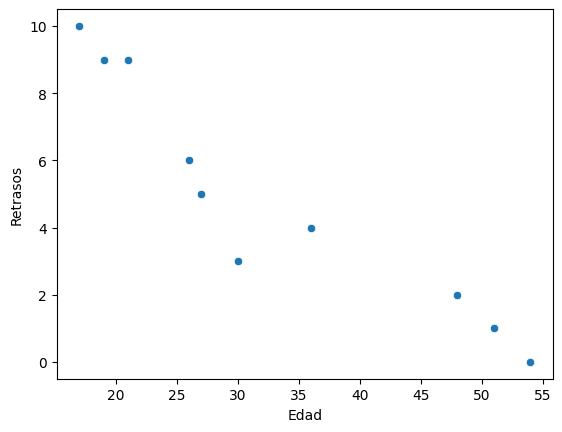

In [121]:
# Your code here
sns.scatterplot(student_data,x="Edad",y="Retrasos")
plt.show()

¿Ves alguna tendencia? ¿Puedes hacer alguna hipótesis sobre la relación entre la edad y el número de retrasos?

*tu explicación aquí* :

Parece que a menor edad hay un mayor número de retrasos, por ejemplo en edades inferiores a 20 los retrasos estan en 9 o más, en cambio a mayor edad los retrasos van disminyendo hasta llegar a 1 o cero en mayores de 50 años


Calcula la covarianza y la correlación de las variables en tu gráfico. ¿Cuál es la diferencia entre estas dos medidas? Compara sus valores. ¿Qué te indican en este caso? Agrega tus respuestas como comentarios después de tu código.

In [122]:
print(f'La covarianza es:\n {np.cov(student_data["Edad"],student_data["Retrasos"])}')

La covarianza es:
 [[187.65555556 -45.56666667]
 [-45.56666667  12.54444444]]


In [123]:
print(f'La correlacion es es:\n {np.corrcoef(student_data["Edad"],student_data["Retrasos"])}')

La correlacion es es:
 [[ 1.         -0.93916269]
 [-0.93916269  1.        ]]


La covarianza  es -45.56 y la correlación es -0.93

La covarianza (-45.56) al ser negativa indica que cuando una aumenta (edad) la otra variable disminuye (retrasos)

El coeficiente de correlación (-0.93) es bastante cercano a 1, lo que indica que hay bastante correlación, como es negativo, indica que al aumentar la edad los retrasos disminuyen




Construye un modelo de regresión para estos datos. ¿Cuál será tu variable de resultado? ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [124]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separo la variable objetivo (retraso) de la caracteristica (edad)

X= student_data['Edad']
y = student_data['Retrasos']

# Dividimos los datos X e y,  en train y test 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

# cambiamos la forma de la array para que sea 2D
X_train = np.reshape(X_train,(-1,1))
X_test = np.reshape(X_test,(-1,1))

# Normalizamos los datos
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# creamos el modelo
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)


In [125]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separo la variable objetivo (retraso) de la caracteristica (edad)

X= student_data['Edad']
y = student_data['Retrasos']

# Dividimos los datos X e y,  en train y test 80% - 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=142)

# cambiamos la forma de la array para que sea 2D
X_train = np.reshape(X_train,(-1,1))
X_test = np.reshape(X_test,(-1,1))

# creamos el modelo y lo entrenamos con los datos
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Hacemos la prediccion usando el modelo
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)


He utilizado un modelo de regresión lineal para predecir el numero de retrasos a partir de la edad.

Grafica tu modelo de regresión en tu diagrama de dispersión.

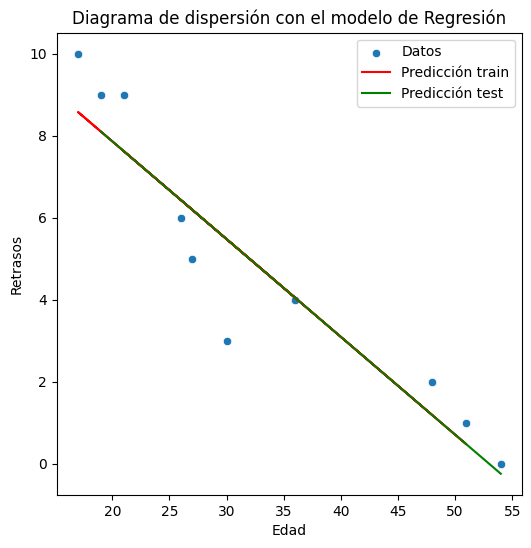

In [126]:
# Graficar los datos de entrenamiento y la línea de regresión
plt.figure(figsize=(6, 6))
sns.scatterplot(student_data,x="Edad",y="Retrasos", label='Datos')
plt.plot(X_train, y_train_pred, color='red', label='Predicción train')
plt.plot(X_test, y_test_pred, color='green', label='Predicción test')
plt.title('Diagrama de dispersión con el modelo de Regresión')
plt.xlabel('Edad')
plt.ylabel('Retrasos')
plt.legend()

plt.show()

In [127]:
from sklearn.metrics import mean_squared_error, r2_score
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f'RMSE: {rmse_test}')
print(f'R^2: {r2_test}')


RMSE: 0.6595594451193834
R^2: 0.9785175969557438


Interpreta los resultados de tu modelo. ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? ¿Podemos decir que la edad es un buen predictor de la tardanza? Agrega tus respuestas como comentarios después de tu código.

El modelo confirma que hay una relación entre los dos datos, aunque hay datos que no siguen está distribución, como el de edad 30 que tiene 3 y según el modelo le corresponderian 5 retrasos o el 18 que tiene 10 y le corresponderian 9, pero se aproxima bastante.

Mirando los errores, vemos un RMSE de 0.6 que indica que la distancia del valor pronosticao está cerca del valor real y un R2 de casi 0.98, que es un valor muy cercano a 1, lo que indica que la predicción es bastante buena.

Con estos datos podriamos decir que la edad es un buen predictor de la tardanza, aunque hay pocos datos y en test solo teniamos 2 valores, por lo que no se puede afirmar que funcionaria para una muestra o población con más datos.

## Desafío 2
Para la segunda parte de este laboratorio, utilizaremos el conjunto de datos vehicles.csv. Puedes encontrar una copia del conjunto de datos en la carpeta de GitHub. Este conjunto de datos incluye variables relacionadas con las características de los vehículos, incluyendo el modelo, la marca y los estándares de eficiencia energética, así como las emisiones de CO2 de cada coche. Como se discutió en clase, el objetivo de este ejercicio es predecir las emisiones de CO2 de los vehículos basándose en varias variables independientes.

In [128]:
# Import any libraries you may need & the data
vehicles = pd.read_csv("vehicles.csv")
vehicles.head(5)

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Vamos a utilizar las siguientes variables para nuestro análisis: Año, Cilindros, Barriles de Combustible/Año, MPG Combinado, y Costo de Combustible/Año. Utilizaremos 'Emisiones de CO2 Gramos/Milla' como nuestra variable de resultado.

Calcula las correlaciones entre cada una de estas variables y el resultado. ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2? Agrega tus respuestas como comentarios después de tu código.

In [129]:
# Separamos las variables que vamos a analizar y miramos el tipo de datos y si tienen nulos
var_analisis=vehicles[['Year','Cylinders','Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']]
var_analisis.info()
var_analisis['Year'].size

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     35952 non-null  int64  
 1   Cylinders                35952 non-null  float64
 2   Fuel Barrels/Year        35952 non-null  float64
 3   Combined MPG             35952 non-null  int64  
 4   Fuel Cost/Year           35952 non-null  int64  
 5   CO2 Emission Grams/Mile  35952 non-null  float64
dtypes: float64(3), int64(3)
memory usage: 1.6 MB


35952

<Axes: xlabel='Year', ylabel='CO2 Emission Grams/Mile'>

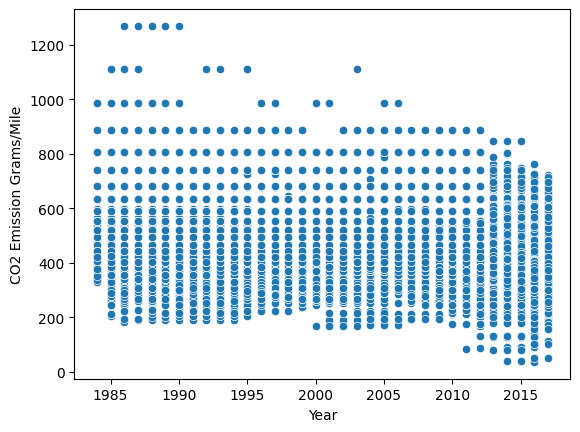

In [130]:
sns.scatterplot(var_analisis,x='Year',y='CO2 Emission Grams/Mile')

<Axes: xlabel='Cylinders', ylabel='CO2 Emission Grams/Mile'>

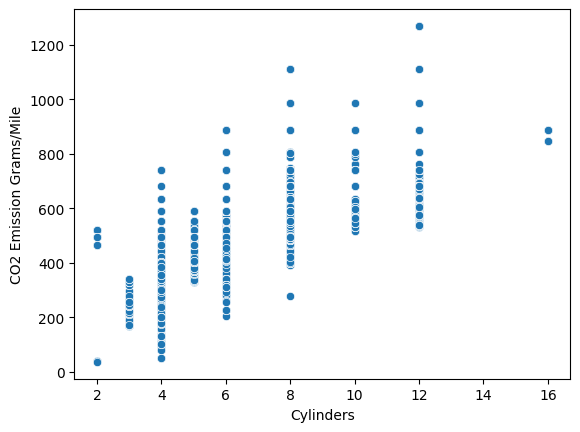

In [131]:
sns.scatterplot(var_analisis,x='Cylinders',y='CO2 Emission Grams/Mile')

<Axes: xlabel='Fuel Barrels/Year', ylabel='CO2 Emission Grams/Mile'>

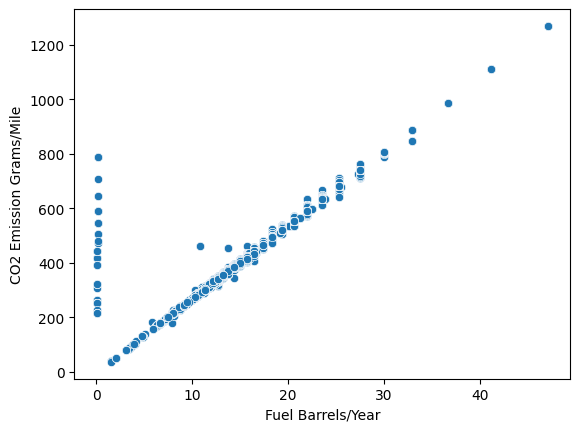

In [132]:
sns.scatterplot(var_analisis,x='Fuel Barrels/Year',y='CO2 Emission Grams/Mile')

<Axes: xlabel='Combined MPG', ylabel='CO2 Emission Grams/Mile'>

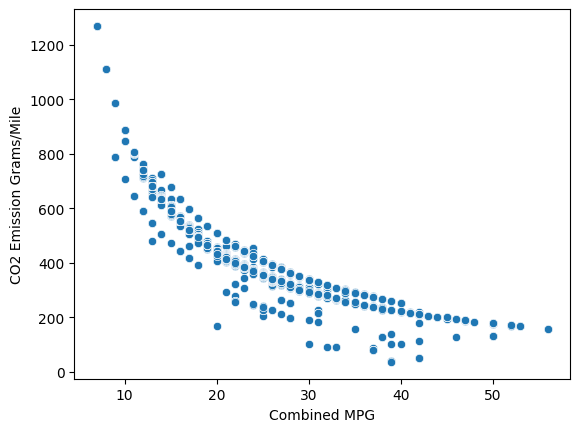

In [133]:
sns.scatterplot(var_analisis,x='Combined MPG',y='CO2 Emission Grams/Mile')

<Axes: xlabel='Fuel Cost/Year', ylabel='CO2 Emission Grams/Mile'>

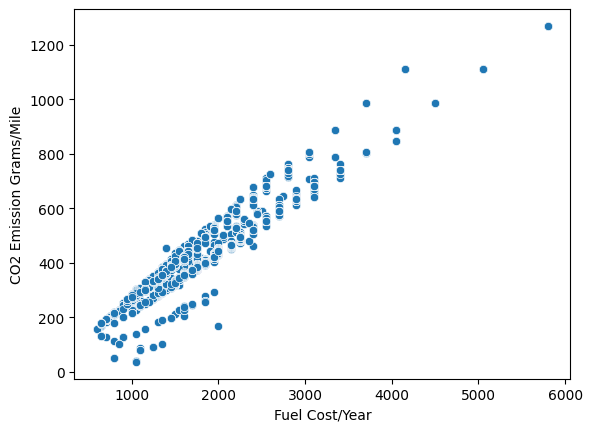

In [134]:
sns.scatterplot(var_analisis,x='Fuel Cost/Year',y='CO2 Emission Grams/Mile')

In [135]:
print(f"Correlación con Year: {var_analisis['CO2 Emission Grams/Mile'].corr(var_analisis['Year'])}")
print(f"Correlación con Cylinders: {var_analisis['CO2 Emission Grams/Mile'].corr(var_analisis['Cylinders'])}")
print(f"Correlación con Fuel Barrels/Year: {var_analisis['CO2 Emission Grams/Mile'].corr(var_analisis['Fuel Barrels/Year'])}")
print(f"Correlación con Combined MPG: {var_analisis['CO2 Emission Grams/Mile'].corr(var_analisis['Combined MPG'])}")
print(f"Correlación con Fuel Cost/Year: {var_analisis['CO2 Emission Grams/Mile'].corr(var_analisis['Fuel Cost/Year'])}")

Correlación con Year: -0.22229960295054227
Correlación con Cylinders: 0.752392553729749
Correlación con Fuel Barrels/Year: 0.9861886621428735
Correlación con Combined MPG: -0.9262290389336435
Correlación con Fuel Cost/Year: 0.9308651512201843


<Axes: >

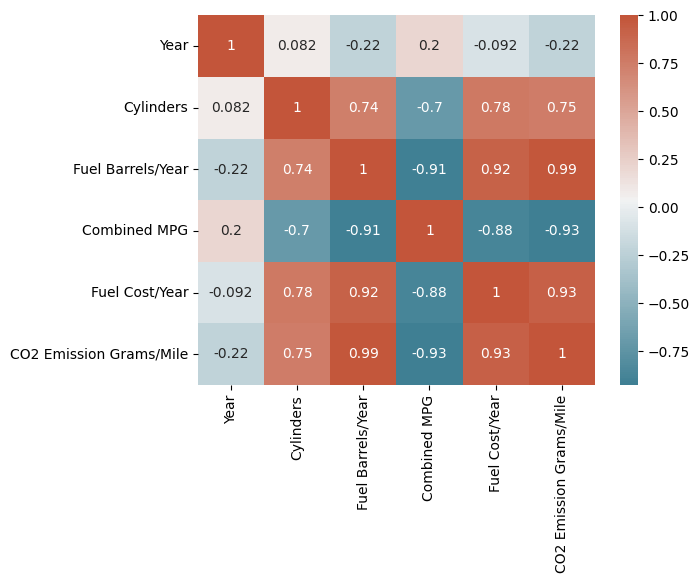

In [136]:
corr = var_analisis.corr()
sns.heatmap(corr,annot = True,cmap= sns.diverging_palette(220, 20, n=200))

 ¿Cuál variable crees que será la más importante para determinar las emisiones de CO2? ¿Cuál proporciona la menor cantidad de información útil para determinar las emisiones de CO2?

 La que proporciona mayor información es Fuel Barrels/Year, seguida de Fuel Cost/Year y Combined MPG

In [137]:
#Como no hay valores null hcemos directamente la visualización de las correlaciones
#sns.pairplot(var_analisis,hue="CO2 Emission Grams/Mile", kind = 'reg')
#fig, ax = plt.subplots(1,5,figsize=(19,3))
#ax[0].scatter(var_analisis,'Year','CO2 Emission Grams/Mile')
#plt.show()

Construye un modelo de regresión para estos datos. ¿Qué tipo de regresión estás utilizando? Agrega tus respuestas como comentarios después de tu código.

In [138]:
# Separamos la variable resultado del resto de variables
X = var_analisis.drop('CO2 Emission Grams/Mile', axis=1)
y = var_analisis['CO2 Emission Grams/Mile']


# Separamos los datos en train y test par X e y con proporcion 80-20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape, X_train.shape, X_test.shape)
print(y.shape, y_train.shape, y_test.shape)


(35952, 5) (28761, 5) (7191, 5)
(35952,) (28761,) (7191,)


In [139]:
# Normalizamos los datos
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

#Creamos la regresion linear y la entrenamos
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Hacemos la prediccion
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)


Imprime el resumen de tu regresión e interpreta los resultados. ¿Cuáles son las variables más importantes en tu modelo y por qué? ¿Qué conclusiones puedes sacar de tu modelo y qué tan confiado estás en estas conclusiones? Agrega tus respuestas como comentarios después de tu código.

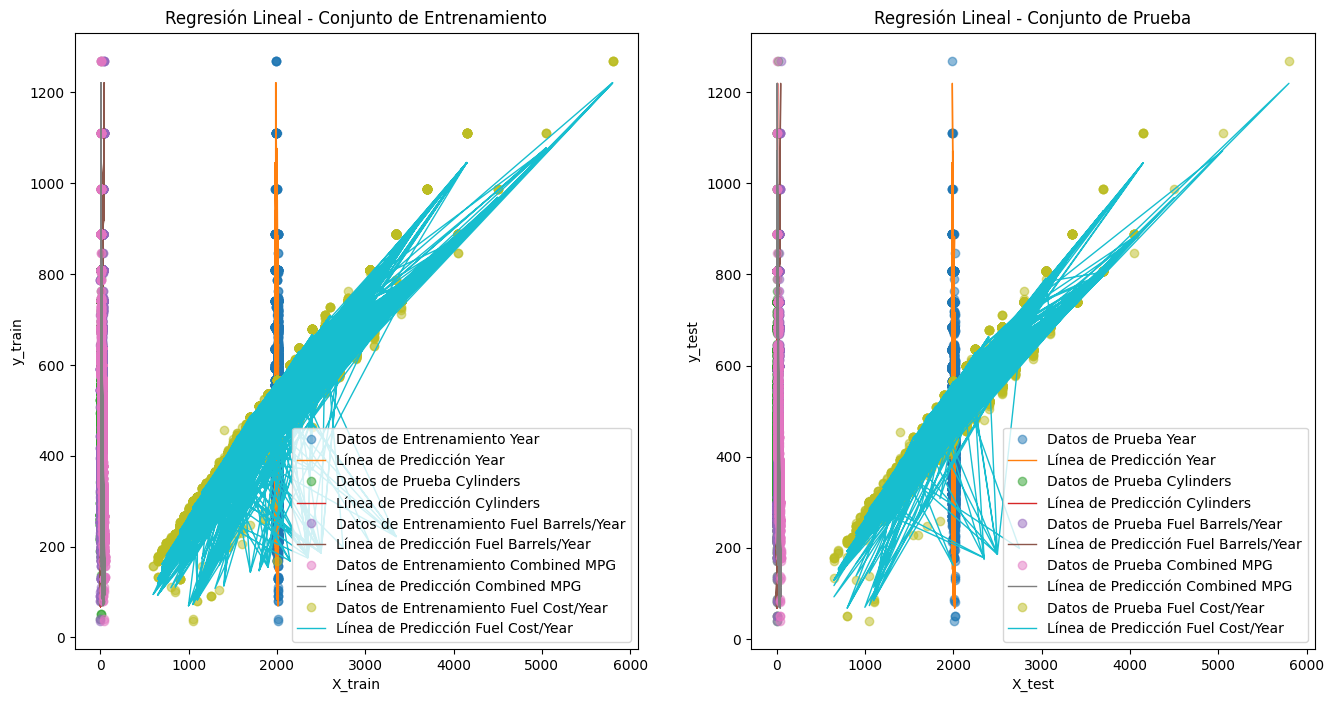

In [144]:
# Graficamos los datos de entrenamiento y la línea de regresión de cada variable
plt.figure(figsize=(16,8))

plt.subplot(1, 2, 1)
#plt.plot(X_train, y_train, "o", alpha=.5 , label='Datos de Entrenamiento')
#plt.plot(X_train, y_train_pred, linewidth=1, label='Línea de Predicción')
plt.plot(X_train["Year"], y_train, "o", alpha=.5 , label='Datos de Entrenamiento Year')
plt.plot(X_train["Year"], y_train_pred, linewidth=1, label='Línea de Predicción Year')
plt.plot(X_test["Cylinders"], y_test, "o", alpha=.5 ,label='Datos de Prueba Cylinders')
plt.plot(X_test["Cylinders"], y_test_pred, linewidth=1, label='Línea de Predicción Cylinders')
plt.plot(X_train["Fuel Barrels/Year"], y_train, "o", alpha=.5 , label='Datos de Entrenamiento Fuel Barrels/Year')
plt.plot(X_train["Fuel Barrels/Year"], y_train_pred, linewidth=1, label='Línea de Predicción Fuel Barrels/Year')
plt.plot(X_train["Combined MPG"], y_train, "o", alpha=.5 , label='Datos de Entrenamiento Combined MPG')
plt.plot(X_train["Combined MPG"], y_train_pred, linewidth=1, label='Línea de Predicción Combined MPG')
plt.plot(X_train["Fuel Cost/Year"], y_train, "o", alpha=.5 , label='Datos de Entrenamiento Fuel Cost/Year')
plt.plot(X_train["Fuel Cost/Year"], y_train_pred, linewidth=1, label='Línea de Predicción Fuel Cost/Year')
plt.title('Regresión Lineal - Conjunto de Entrenamiento')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()

# Graficamos los datos de prueba y la línea de regresión de cada variable
plt.subplot(1, 2, 2)
#plt.plot(X_test, y_test, "o", alpha=.5 ,label='Datos de Prueba')
#plt.plot(X_test, y_test_pred, linewidth=1, label='Línea de Predicción')
plt.plot(X_test["Year"], y_test, "o", alpha=.5 ,label='Datos de Prueba Year')
plt.plot(X_test["Year"], y_test_pred, linewidth=1, label='Línea de Predicción Year')
plt.plot(X_test["Cylinders"], y_test, "o", alpha=.5 ,label='Datos de Prueba Cylinders')
plt.plot(X_test["Cylinders"], y_test_pred, linewidth=1, label='Línea de Predicción Cylinders')
plt.plot(X_test["Fuel Barrels/Year"], y_test, "o", alpha=.5 ,label='Datos de Prueba Fuel Barrels/Year')
plt.plot(X_test["Fuel Barrels/Year"], y_test_pred, linewidth=1, label='Línea de Predicción Fuel Barrels/Year')
plt.plot(X_test["Combined MPG"], y_test, "o", alpha=.5 ,label='Datos de Prueba Combined MPG')
plt.plot(X_test["Combined MPG"], y_test_pred, linewidth=1, label='Línea de Predicción Combined MPG')
plt.plot(X_test["Fuel Cost/Year"], y_test, "o", alpha=.5 ,label='Datos de Prueba Fuel Cost/Year')
plt.plot(X_test["Fuel Cost/Year"], y_test_pred, linewidth=1, label='Línea de Predicción Fuel Cost/Year')
plt.title('Regresión Lineal - Conjunto de Prueba')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()

plt.show()

In [145]:
X_train["Year"]

17468    2005
27931    1985
22900    1991
19372    2013
5960     1987
         ... 
16850    1997
6265     1993
11284    2006
860      2013
15795    2005
Name: Year, Length: 28761, dtype: int64

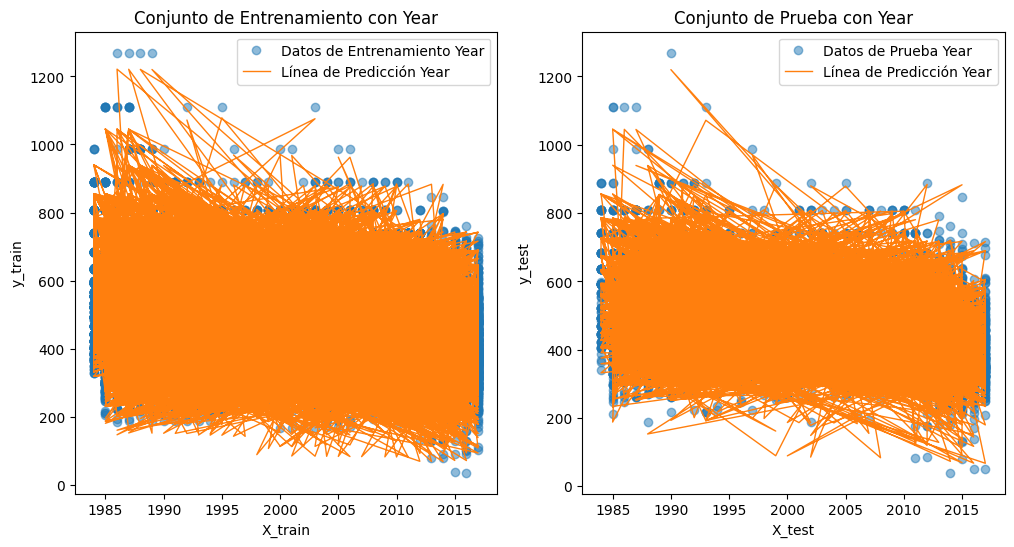

In [166]:
# Graficamos los datos de entrenamiento y la línea de regresión de year
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(X_train["Year"], y_train, "o", alpha=.5 , label='Datos de Entrenamiento Year')
#plt.scatter(X_train["Year"], y_train, color='blue', label='Datos de Entrenamiento')
plt.plot(X_train["Year"], y_train_pred, linewidth=1, label='Línea de Predicción Year')
plt.title('Conjunto de Entrenamiento con Year')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()

# Graficamos los datos de prueba y la línea de regresión de year
plt.subplot(1, 2, 2)
plt.plot(X_test["Year"], y_test, "o", alpha=.5 ,label='Datos de Prueba Year')
plt.plot(X_test["Year"], y_test_pred, linewidth=1, label='Línea de Predicción Year')
plt.title('Conjunto de Prueba con Year')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()

plt.show()

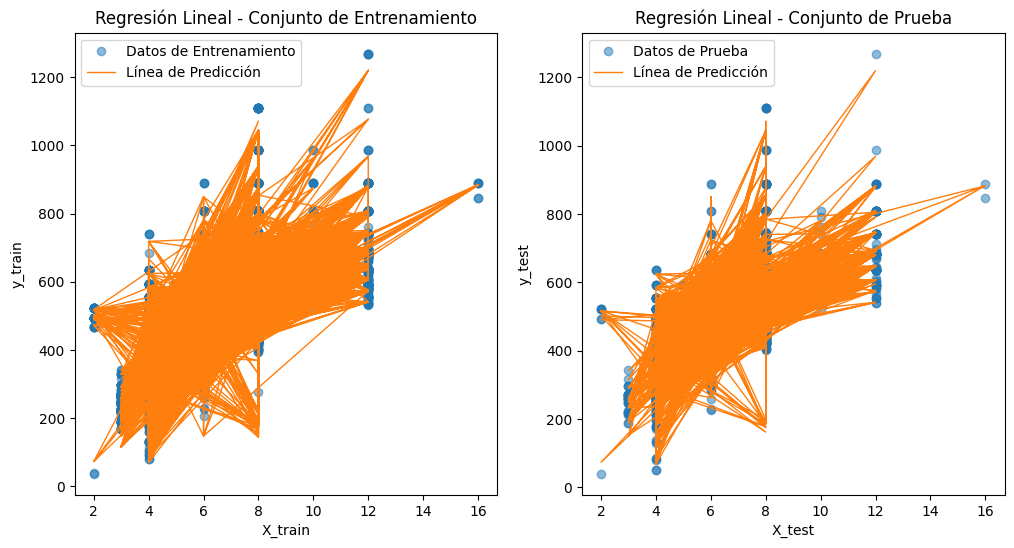

In [147]:
# Graficamos los datos de entrenamiento y la línea de regresión de Cylinders
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(X_train["Cylinders"], y_train, "o", alpha=.5 , label='Datos de Entrenamiento')
#plt.scatter(X_train["Cylinders"], y_train, color='blue', label='Datos de Entrenamiento')
plt.plot(X_train["Cylinders"], y_train_pred, linewidth=1, label='Línea de Predicción')
plt.title('Regresión Lineal - Conjunto de Entrenamiento')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()

# Graficamos los datos de prueba y la línea de regresión de Cylinders
plt.subplot(1, 2, 2)
plt.plot(X_test["Cylinders"], y_test, "o", alpha=.5 ,label='Datos de Prueba')
plt.plot(X_test["Cylinders"], y_test_pred, linewidth=1, label='Línea de Predicción')
plt.title('Regresión Lineal - Conjunto de Prueba')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()

plt.show()

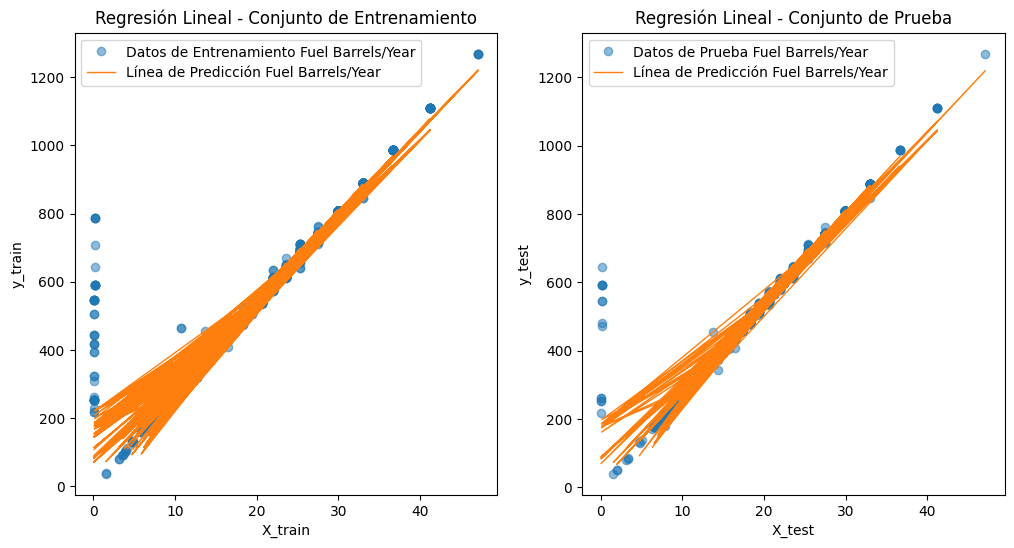

In [148]:
# Graficamos los datos de entrenamiento y la línea de regresión de Fuel Barrels/Year
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(X_train["Fuel Barrels/Year"], y_train, "o", alpha=.5 , label='Datos de Entrenamiento Fuel Barrels/Year')
plt.plot(X_train["Fuel Barrels/Year"], y_train_pred, linewidth=1, label='Línea de Predicción Fuel Barrels/Year')
plt.title('Regresión Lineal - Conjunto de Entrenamiento')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()

# Graficamos los datos de prueba y la línea de regresión de Fuel Barrels/Year
plt.subplot(1, 2, 2)
plt.plot(X_test["Fuel Barrels/Year"], y_test, "o", alpha=.5 ,label='Datos de Prueba Fuel Barrels/Year')
plt.plot(X_test["Fuel Barrels/Year"], y_test_pred, linewidth=1, label='Línea de Predicción Fuel Barrels/Year')
plt.title('Regresión Lineal - Conjunto de Prueba')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()

plt.show()

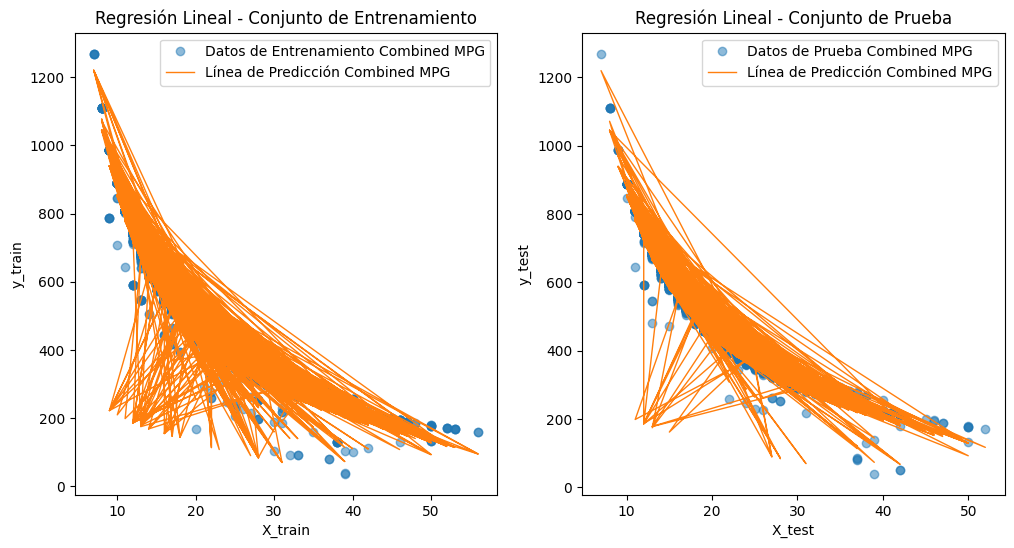

In [149]:
# Graficamos los datos de entrenamiento y la línea de regresión de Combined MPG
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(X_train["Combined MPG"], y_train, "o", alpha=.5 , label='Datos de Entrenamiento Combined MPG')
plt.plot(X_train["Combined MPG"], y_train_pred, linewidth=1, label='Línea de Predicción Combined MPG')
plt.title('Regresión Lineal - Conjunto de Entrenamiento')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()

# Graficamos los datos de prueba y la línea de regresión de Combined MPG
plt.subplot(1, 2, 2)
plt.plot(X_test["Combined MPG"], y_test, "o", alpha=.5 ,label='Datos de Prueba Combined MPG')
plt.plot(X_test["Combined MPG"], y_test_pred, linewidth=1, label='Línea de Predicción Combined MPG')
plt.title('Regresión Lineal - Conjunto de Prueba')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()

plt.show()

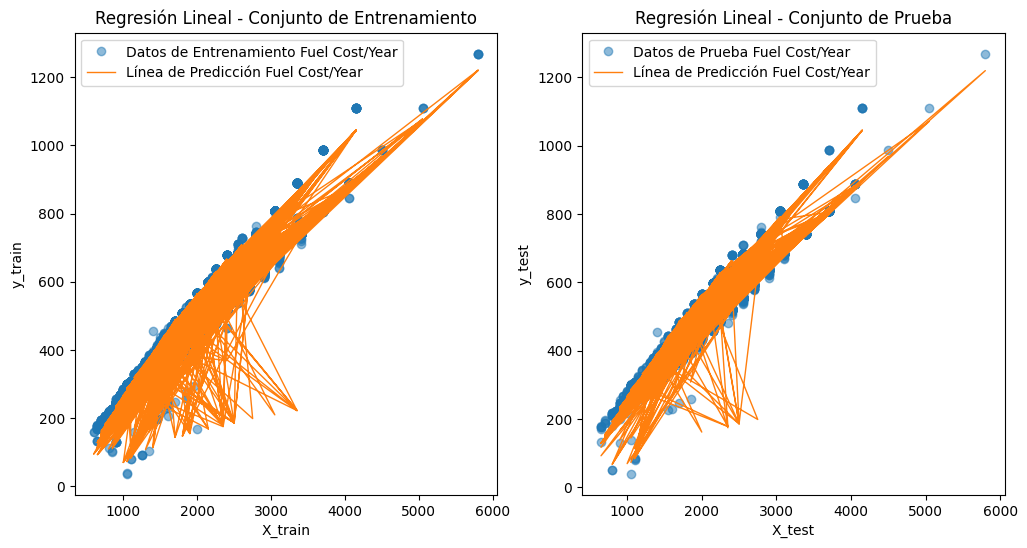

In [150]:
# Graficamos los datos de entrenamiento y la línea de regresión de Fuel Cost/Year
plt.figure(figsize=(12,6))

plt.subplot(1, 2, 1)
plt.plot(X_train["Fuel Cost/Year"], y_train, "o", alpha=.5 , label='Datos de Entrenamiento Fuel Cost/Year')
plt.plot(X_train["Fuel Cost/Year"], y_train_pred, linewidth=1, label='Línea de Predicción Fuel Cost/Year')
plt.title('Regresión Lineal - Conjunto de Entrenamiento')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()

# Graficamos los datos de prueba y la línea de regresión de Fuel Cost/Year
plt.subplot(1, 2, 2)
plt.plot(X_test["Fuel Cost/Year"], y_test, "o", alpha=.5 ,label='Datos de Prueba Fuel Cost/Year')
plt.plot(X_test["Fuel Cost/Year"], y_test_pred, linewidth=1, label='Línea de Predicción Fuel Cost/Year')
plt.title('Regresión Lineal - Conjunto de Prueba')
plt.xlabel('X_test')
plt.ylabel('y_test')
plt.legend()

plt.show()

In [164]:
'Miramos las estadisticas del modelo'

mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print(f'RMSE (Train): {rmse_train}')
print(f'R^2 (Train): {r2_train}')

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print(f'RMSE (Test): {rmse_test}')
print(f'R^2 (Test): {r2_test}')

RMSE (Train): 16.32614750834792
R^2 (Train): 0.9812190180453002
RMSE (Test): 17.02432800674899
R^2 (Test): 0.9794542628636334


In [172]:
y.describe()

count    35952.000000
mean       475.316339
std        119.060773
min         37.000000
25%        395.000000
50%        467.736842
75%        555.437500
max       1269.571429
Name: CO2 Emission Grams/Mile, dtype: float64

Parece que las variables más importantes son Fuel Barrels/Year, Fuel Cost/Year y Combined MPG.

El RMSE es de 16 - 17 lo que indica que hay errores con una diferencia de 16-17 sobre la media del valor de CO2 Emission Grams/Mile que es de 475, por lo que no es un valor elevado (3.3%, eso indica que podría ser un error aceptable.
r2 es 0.97, que es un valor bastante cercano a 1, por lo que también indica que podria ser un buen modelo.

## Desafío Extra: Análisis de Errores

Estoy sospechando de las últimas fiestas que he organizado: parece que cuanto más gente invito, más personas no pueden asistir. Para saber si mi presentimiento está respaldado por los datos, he decidido hacer un análisis. He recopilado mis datos en la tabla a continuación, donde X es el número de personas que invité, y Y es el número de personas que asistieron.

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

Queremos saber si la relación modelada por las dos variables aleatorias es lineal o no, y por lo tanto, si es apropiado modelarla con una regresión lineal.
Primero, construye un dataframe con los datos.

Dibuja un diagrama de dispersión (scatter plot) para los datos y ajusta una línea de regresión.

¿Qué ves? ¿Qué te indica este gráfico sobre la probable relación entre las variables? Imprime los resultados de tu regresión.

*tu explicación aquí*

¿Ves algún punto problemático o valores atípicos en tus datos? Elimina estos puntos y recalcula tu regresión. Imprime el nuevo diagrama de dispersión con tu nuevo modelo y los resultados de tu modelo.

In [153]:
# Your response here.

¿Qué cambió? Basado en los resultados de los dos modelos y tus gráficos, ¿qué puedes decir sobre la forma de los datos con el punto problemático y sin él?

*tu explicación aquí*